# Data Objects and Time Series Data

Just like before, we will load up yt.  Since we'll be using pylab to plot some data in this notebook, we additionally tell matplotlib to place plots inline inside the notebook.

In [1]:
%matplotlib inline
import yt
import numpy as np
from matplotlib import pylab

## Time Series Data

Unlike before, instead of loading a single dataset, this time we'll load a bunch which we'll examine in sequence.  This command creates a `DatasetSeries` object, which can be iterated over (including in parallel, which is outside the scope of this quickstart) and analyzed.  There are some other helpful operations it can provide, but we'll stick to the basics here.

Note that you can specify either a list of filenames, or a glob (i.e., asterisk) pattern in this.

In [2]:
ts = yt.load('enzo_tiny_cosmology/DD????/DD????')

### Simple Time Series

As a simple example of how we can use this functionality, let's find the min and max of the density as a function of time in this simulation.  To do this we use the construction `for ds in ts` where `ds` means "Dataset" and `ts` is the "Time Series" we just loaded up.  For each dataset, we'll create an object (`ad`) that covers the entire domain.  (`all_data` is a shorthand function for this.)  We'll then call the `extrema` Derived Quantity, and append the min and max to our extrema outputs.  Lastly, we're turn down yt's logging to only show "error"s so as to not produce too much logging text, as it loads each individual dataset below.

In [3]:
yt.set_log_level("error")
rho_ex = []
times = []
for ds in ts:
    ad = ds.all_data()
    rho_ex.append(ad.quantities.extrema("density"))
    times.append(ds.current_time.in_units("Gyr"))
rho_ex = np.array(rho_ex)

Parsing Hierarchy : 100%|█████████▉| 210/211 [00:00<00:00, 12620.96it/s]


Now we plot the minimum and the maximum:

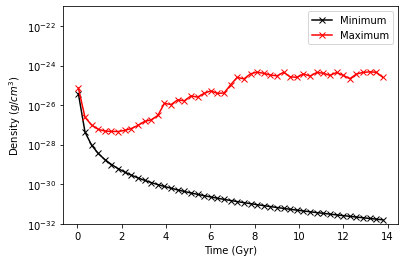

In [4]:
pylab.semilogy(times, rho_ex[:,0], '-xk', label='Minimum')
pylab.semilogy(times, rho_ex[:,1], '-xr', label='Maximum')
pylab.ylabel("Density ($g/cm^3$)")
pylab.xlabel("Time (Gyr)")
pylab.legend()
pylab.ylim(1e-32, 1e-21)
pylab.show()

## Data Objects

Time series data have many applications, but most of them rely on examining the underlying data in some way.  Below, we'll see how to use and manipulate data objects.

### Ray Queries

yt provides the ability to examine rays, or lines, through the domain.  Note that these are not periodic, unlike most other data objects.  We create a ray object and can then examine quantities of it.  Rays have the special fields `t` and `dts`, which correspond to the time the ray enters a given cell and the distance it travels through that cell.

To create a ray, we specify the start and end points.

Note that we need to convert these arrays to numpy arrays due to a bug in matplotlib 1.3.1.

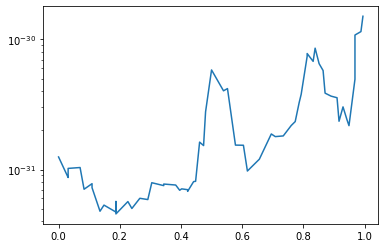

In [5]:
ray = ds.ray([0.1, 0.2, 0.3], [0.9, 0.8, 0.7])
pylab.semilogy(np.array(ray["t"]), np.array(ray["density"]))

In [6]:
print (ray["dts"])

[3.12500000e-02 1.38777878e-17 3.46944695e-17 3.90625000e-02
 1.30208333e-02 2.60416667e-02 2.77555756e-17 2.60416667e-02
 1.30208333e-02 3.90625000e-02 5.55111512e-17 2.77555756e-17
 3.90625000e-02 1.30208333e-02 2.60416667e-02 2.60416667e-02
 1.30208333e-02 3.90625000e-02 1.11022302e-16 3.90625000e-02
 1.30208333e-02 6.51041667e-03 1.95312500e-02 5.55111512e-17
 1.95312500e-02 6.51041667e-03 1.30208333e-02 1.30208333e-02
 6.51041667e-03 1.95312500e-02 3.90625000e-02 1.30208333e-02
 2.60416667e-02 2.60416667e-02 1.30208333e-02 3.90625000e-02
 3.90625000e-02 1.30208333e-02 2.60416667e-02 2.60416667e-02
 1.30208333e-02 1.30208333e-02 6.51041667e-03 1.95312500e-02
 1.11022302e-16 1.95312500e-02 6.51041667e-03 1.30208333e-02
 1.30208333e-02 6.51041667e-03 1.95312500e-02 1.95312500e-02
 6.51041667e-03 1.30208333e-02 1.30208333e-02 6.51041667e-03
 1.95312500e-02 1.11022302e-16 1.95312500e-02 6.51041667e-03
 5.20833333e-03] dimensionless


In [7]:
print (ray["t"])

[0.         0.03125    0.03125    0.03125    0.0703125  0.08333333
 0.109375   0.109375   0.13541667 0.1484375  0.1875     0.1875
 0.1875     0.2265625  0.23958333 0.265625   0.29166667 0.3046875
 0.34375    0.34375    0.3828125  0.39583333 0.40234375 0.421875
 0.421875   0.44140625 0.44791667 0.4609375  0.47395833 0.48046875
 0.5        0.5390625  0.55208333 0.578125   0.60416667 0.6171875
 0.65625    0.6953125  0.70833333 0.734375   0.76041667 0.7734375
 0.78645833 0.79296875 0.8125     0.8125     0.83203125 0.83854167
 0.8515625  0.86458333 0.87109375 0.890625   0.91015625 0.91666667
 0.9296875  0.94270833 0.94921875 0.96875    0.96875    0.98828125
 0.99479167] dimensionless


In [8]:
print (ray[("gas", "x")])

[1.53844324e+25 1.53844324e+25 1.97799845e+25 1.97799845e+25
 2.41755367e+25 2.41755367e+25 2.85710888e+25 2.85710888e+25
 2.85710888e+25 3.29666409e+25 3.29666409e+25 3.73621930e+25
 3.73621930e+25 4.17577452e+25 4.17577452e+25 4.61532973e+25
 4.61532973e+25 5.05488494e+25 5.05488494e+25 5.49444015e+25
 5.82410656e+25 5.82410656e+25 6.04388417e+25 6.04388417e+25
 6.26366177e+25 6.48343938e+25 6.48343938e+25 6.70321699e+25
 6.70321699e+25 6.92299459e+25 7.25266100e+25 7.69221621e+25
 7.69221621e+25 8.13177143e+25 8.13177143e+25 8.57132664e+25
 9.01088185e+25 9.45043706e+25 9.45043706e+25 9.88999227e+25
 9.99988108e+25 1.02196587e+26 1.02196587e+26 1.04394363e+26
 1.04394363e+26 1.06592139e+26 1.08789915e+26 1.08789915e+26
 1.10987691e+26 1.10987691e+26 1.13185467e+26 1.15383243e+26
 1.17581019e+26 1.17581019e+26 1.19778795e+26 1.19778795e+26
 1.21976571e+26 1.21976571e+26 1.24174347e+26 1.26372124e+26
 1.26372124e+26] cm


### Slice Queries

While slices are often used for visualization, they can be useful for other operations as well.  yt regards slices as multi-resolution objects.  They are an array of cells that are not all the same size; it only returns the cells at the highest resolution that it intersects.  (This is true for all yt data objects.)  Slices and projections have the special fields `px`, `py`, `pdx` and `pdy`, which correspond to the coordinates and half-widths in the pixel plane.

In [9]:
ds = yt.load_sample("IsolatedGalaxy")
v, c = ds.find_max(("gas", "density"))
sl = ds.slice(2, c[0])
print (sl["index", "x"])
print (sl["index", "z"])
print (sl["pdx"])
print (sl["gas", "density"].shape)

Parsing Hierarchy :  99%|█████████▉| 172/173 [00:00<00:00, 11918.59it/s]


[0.015625   0.015625   0.015625   ... 0.49743652 0.49743652 0.49743652] code_length
[0.515625   0.515625   0.515625   ... 0.50402832 0.50402832 0.50402832] code_length
[0.015625   0.015625   0.015625   ... 0.00012207 0.00012207 0.00012207] code_length
(35308,)


If we want to do something interesting with a `Slice`, we can turn it into a `FixedResolutionBuffer`.  This object can be queried and will return a 2D array of values.

In [10]:
frb = sl.to_frb((50.0, 'kpc'), 1024)
print (frb["gas", "density"].shape)

(1024, 1024)


yt provides a few functions for writing arrays to disk, particularly in image form.  Here we'll write out the log of `density`, and then use IPython to display it back here.  Note that for the most part, you will probably want to use a `PlotWindow` for this, but in the case that it is useful you can directly manipulate the data.

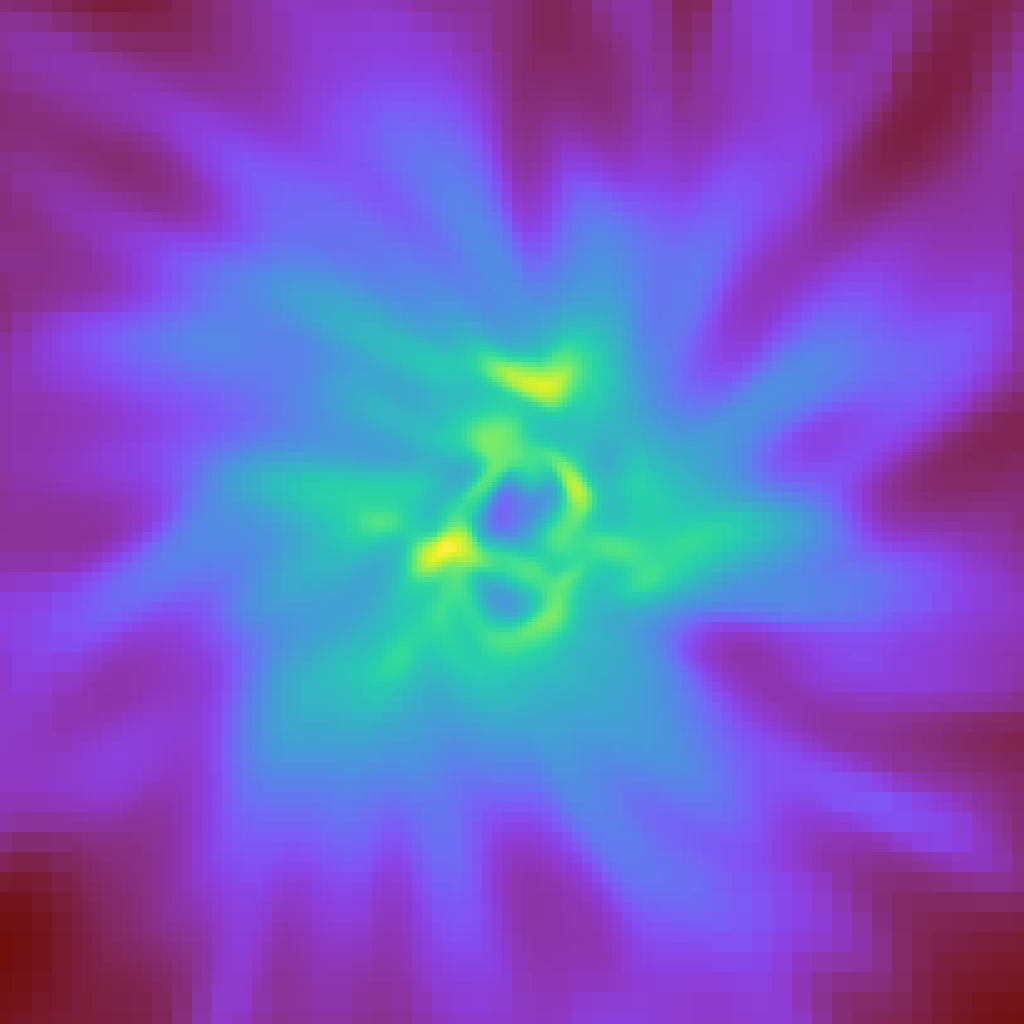

In [11]:
yt.write_image(np.log10(frb["gas", "density"]), "temp.png")
from IPython.display import Image
Image(filename="temp.png")

### Off-Axis Slices

yt provides not only slices, but off-axis slices that are sometimes called "cutting planes."  These are specified by (in order) a normal vector and a center.  Here we've set the normal vector to `[0.2, 0.3, 0.5]` and the center to be the point of maximum density.

We can then turn these directly into plot windows using `to_pw`.  Note that the `to_pw` and `to_frb` methods are available on slices, off-axis slices, and projections, and can be used on any of them.

In [12]:
cp = ds.cutting([0.2, 0.3, 0.5], "max")
pw = cp.to_pw(fields=[("gas", "density")])

Once we have our plot window from our cutting plane, we can show it here.


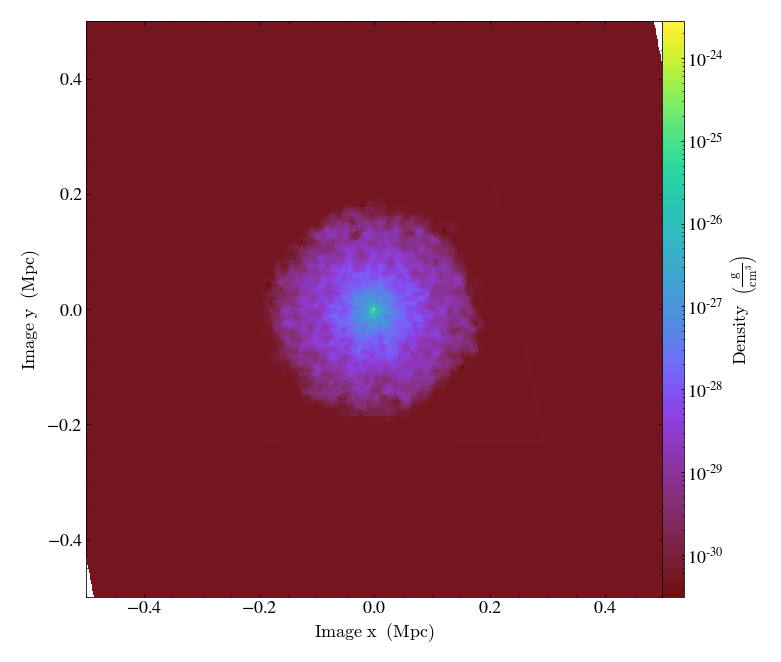

In [13]:
pw.show()


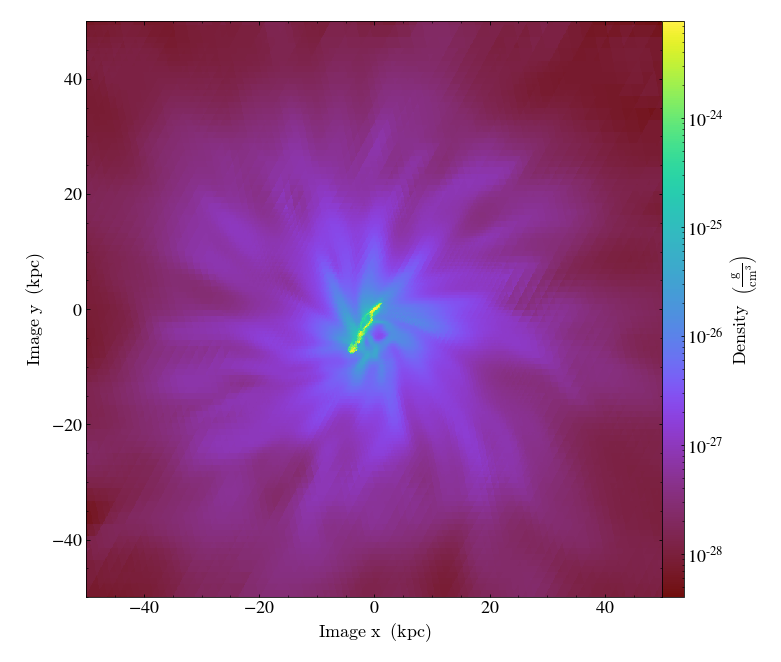

In [14]:
pw.zoom(10)

We can, as noted above, do the same with our slice:


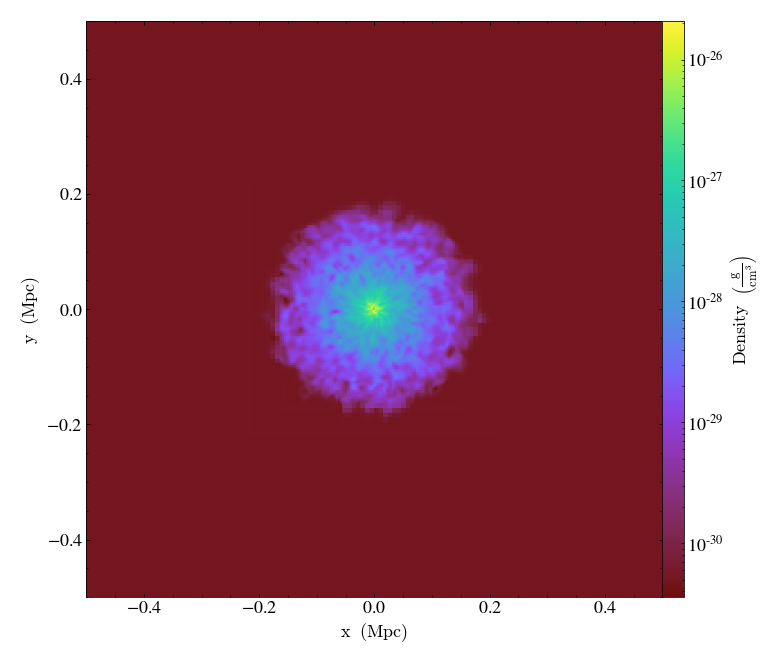

[('gas', 'density')]


In [15]:
pws = sl.to_pw(fields=[("gas", "density")])
pws.show()
print (list(pws.plots.keys()))

### Covering Grids

If we want to access a 3D array of data that spans multiple resolutions in our simulation, we can use a covering grid.  This will return a 3D array of data, drawing from up to the resolution level specified when creating the data.  For example, if you create a covering grid that spans two child grids of a single parent grid, it will fill those zones covered by a zone of a child grid with the data from that child grid.  Where it is covered only by the parent grid, the cells from the parent grid will be duplicated (appropriately) to fill the covering grid.

There are two different types of covering grids: unsmoothed and smoothed.  Smoothed grids will be filled through a cascading interpolation process; they will be filled at level 0, interpolated to level 1, filled at level 1, interpolated to level 2, filled at level 2, etc.  This will help to reduce edge effects.  Unsmoothed covering grids will not be interpolated, but rather values will be duplicated multiple times.

Here we create an unsmoothed covering grid at level 2, with the left edge at `[0.0, 0.0, 0.0]` and with dimensions equal to those that would cover the entire domain at level 2.  We can then ask for the Density field, which will be a 3D array.

In [16]:
cg = ds.covering_grid(2, [0.0, 0.0, 0.0], ds.domain_dimensions * 2**2)
print (cg["density"].shape)

(128, 128, 128)


In this example, we do exactly the same thing: except we ask for a *smoothed* covering grid, which will reduce edge effects.

In [17]:
scg = ds.smoothed_covering_grid(2, [0.0, 0.0, 0.0], ds.domain_dimensions * 2**2)
print (scg["density"].shape)

(128, 128, 128)
